In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2020.csv')
df.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2020-01-01,11,10,12,10,11,10,3.9,97,7.875,1029,85.750,11,10,8,353,248,353,0,1,3.3,bad,1,1
1,2020-01-02,12,9,21,9,11,10,0.1,91,8.625,1029,95.125,12,9,8,122,122,122,0,1,3.3,bad,1,2
2,2020-01-03,12,10,24,11,12,10,0.6,94,9.375,1032,77.000,12,10,8,176,116,176,0,1,5.1,bad,1,3
3,2020-01-04,9,5,7,5,8,7,0.0,90,10.000,1038,12.375,9,6,3,113,116,116,0,1,8.7,very bad,1,4
4,2020-01-05,9,4,10,4,7,7,0.0,88,10.000,1038,18.625,9,5,3,116,116,116,0,1,8.7,very bad,1,5


# 1. Exploration des données

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    366 non-null    object 
 1   MAX_TEMPERATURE_C       366 non-null    int64  
 2   MIN_TEMPERATURE_C       366 non-null    int64  
 3   WINDSPEED_MAX_KMH       366 non-null    int64  
 4   TEMPERATURE_MORNING_C   366 non-null    int64  
 5   TEMPERATURE_NOON_C      366 non-null    int64  
 6   TEMPERATURE_EVENING_C   366 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     366 non-null    float64
 8   HUMIDITY_MAX_PERCENT    366 non-null    int64  
 9   VISIBILITY_AVG_KM       366 non-null    float64
 10  PRESSURE_MAX_MB         366 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  366 non-null    float64
 12  HEATINDEX_MAX_C         366 non-null    int64  
 13  DEWPOINT_MAX_C          366 non-null    int64  
 14  WINDTEMP_MAX_C          366 non-null    in

24 colonnes, pas de valeurs nulles


In [8]:
# colonnes numériques : a.k.a features possibles : 22 colonnes
df.select_dtypes(include='number').columns

Index(['MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'MONTH', 'DAY'],
      dtype='object')

In [5]:
# stats de positions
df.describe()

,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,MONTH,DAY
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.0,366.000000,366.000000,366.000000,366.000000
mean,16.997268,11.259563,20.991803,10.631148,15.770492,15.275956,3.169126,86.603825,9.237022,1019.562842,50.017760,17.311475,11.256831,9.707650,160.926230,166.172131,181.278689,0.0,3.639344,9.269126,6.513661,15.756831
std,6.369232,4.510670,8.546565,4.601133,6.018857,6.450046,6.408436,7.501151,1.059369,8.309106,28.935057,6.688467,4.225123,5.728018,74.537276,81.604763,93.009523,0.0,1.681807,3.399074,3.455958,8.823592
min,5.000000,0.000000,3.000000,-1.000000,3.000000,3.000000,0.000000,47.000000,3.000000,982.000000,0.000000,5.000000,0.000000,-5.000000,113.000000,113.000000,113.000000,0.0,1.000000,3.300000,1.000000,1.000000
25%,12.000000,8.000000,14.000000,8.000000,11.000000,10.000000,0.000000,83.000000,8.750000,1016.000000,24.750000,12.000000,8.000000,6.000000,116.000000,116.000000,116.000000,0.0,3.000000,6.700000,4.000000,8.000000
50%,16.000000,11.000000,20.000000,11.000000,15.000000,14.000000,0.400000,88.500000,9.875000,1020.000000,53.937500,16.000000,12.000000,10.000000,119.000000,116.000000,122.000000,0.0,4.000000,9.100000,7.000000,16.000000
75%,21.000000,15.000000,26.000000,14.000000,20.000000,20.000000,2.900000,92.000000,10.000000,1024.000000,74.000000,23.000000,14.000000,14.000000,176.000000,176.000000,176.000000,0.0,5.000000,11.600000,9.750000,23.000000
max,38.000000,23.000000,50.000000,23.000000,35.000000,37.000000,53.300000,99.000000,10.000000,1044.000000,100.000000,38.000000,22.000000,23.000000,353.000000,389.000000,389.000000,0.0,8.000000,14.500000,12.000000,31.000000


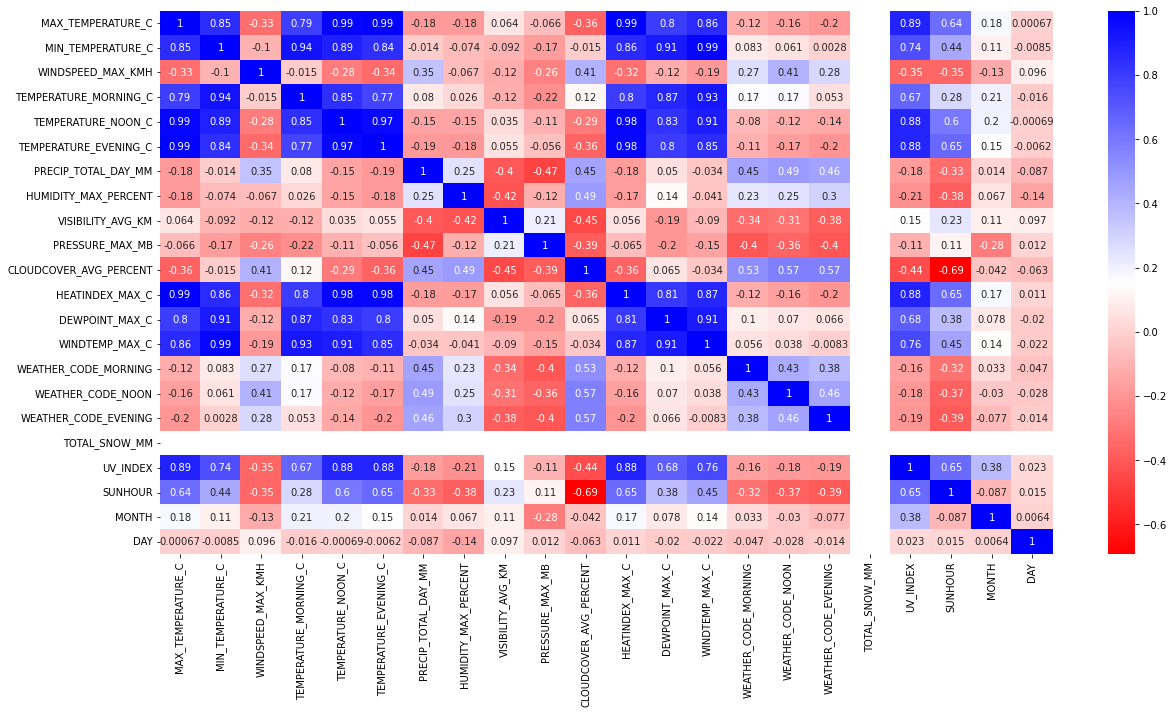

In [6]:
# corrélations: 
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, cmap='bwr_r')
plt.show()

On note une corrélation positive pour les variables en bleu, et une corrélation négative entre les variables en rouge. 

In [10]:
# fonction qui plot à gauche la dispersion de ma variable et à droite la distribution
def get_plot(col):
  fig, ax = plt.subplots(1,2, figsize = (10,5))
  ax1 = plt.subplot(121)
  sns.boxplot(ax = ax1, x=df[col], palette='pastel')
  ax2 = plt.subplot(122)
  sns.histplot(ax = ax2,x=df[col], kde=True, palette='pastel')
 
  plt.show()

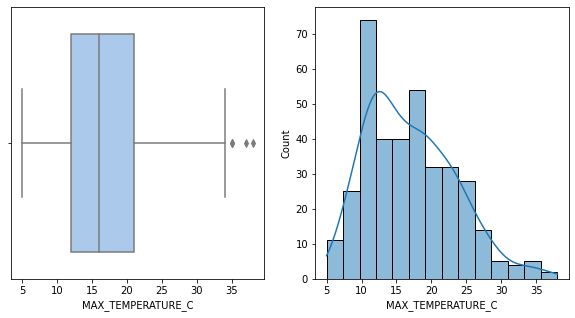

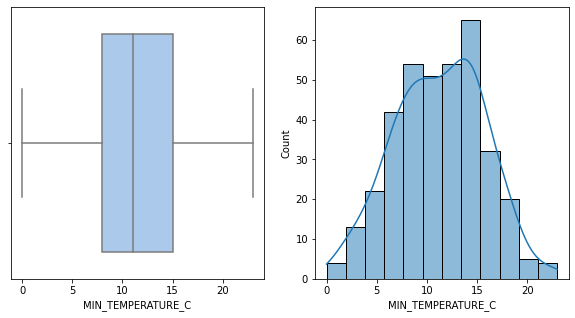

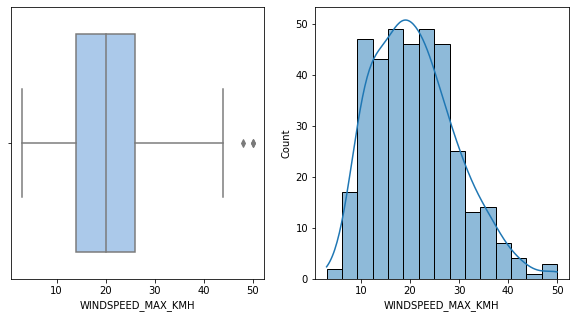

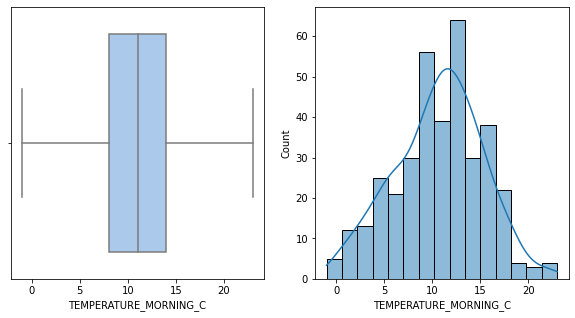

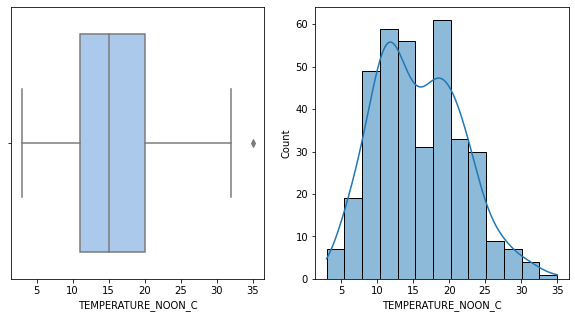

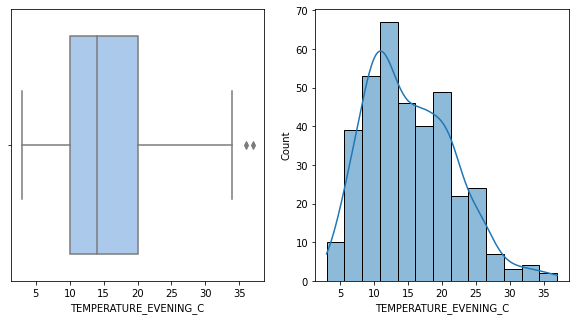

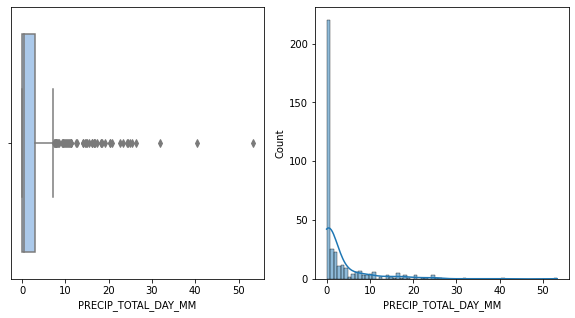

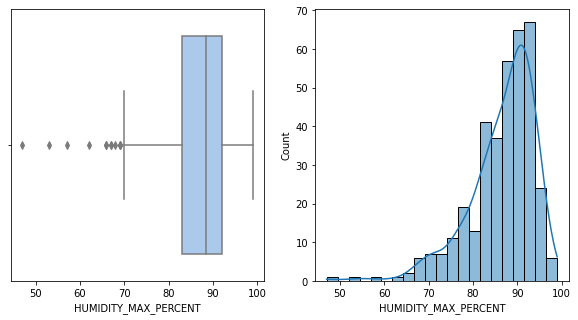

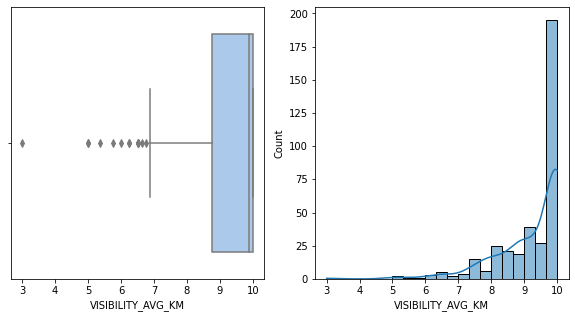

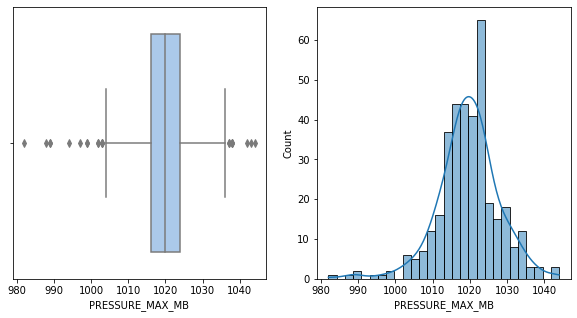

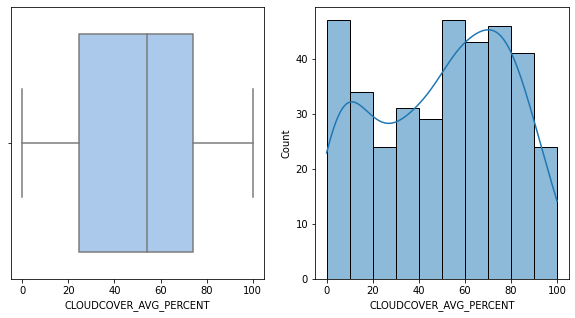

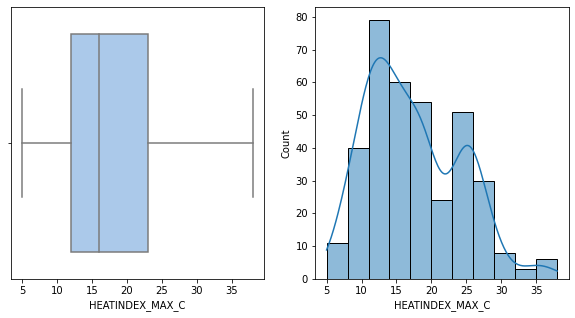

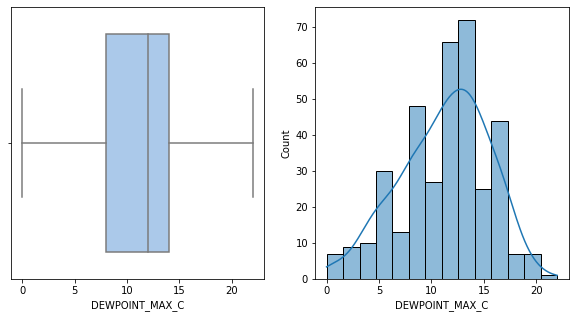

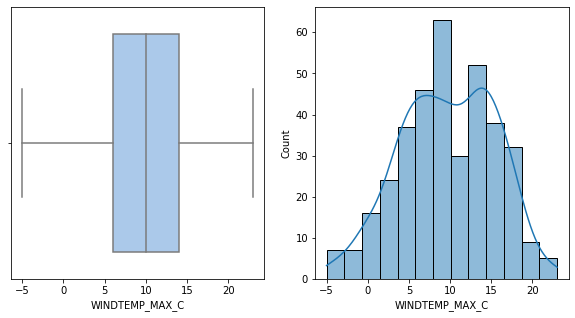

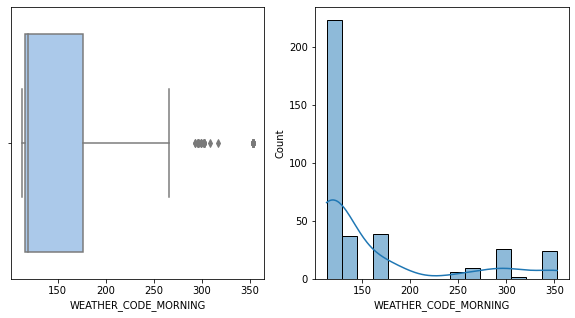

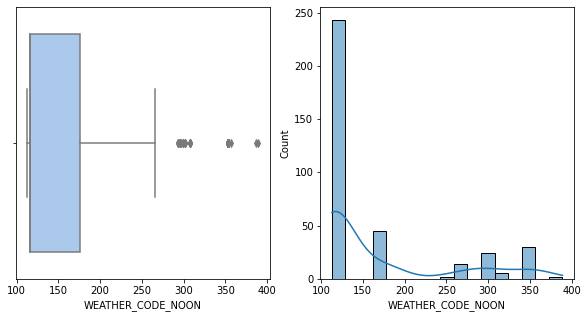

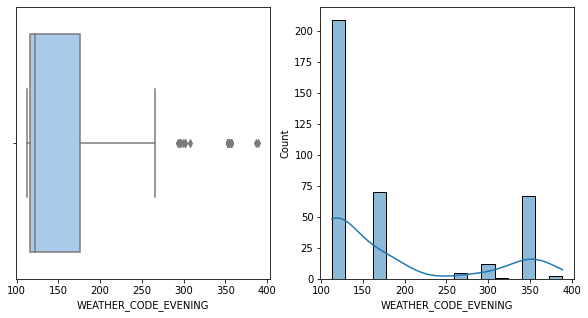

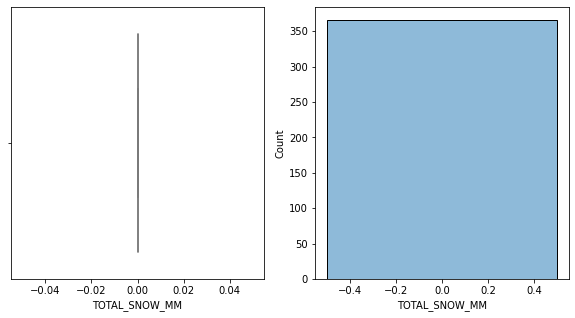

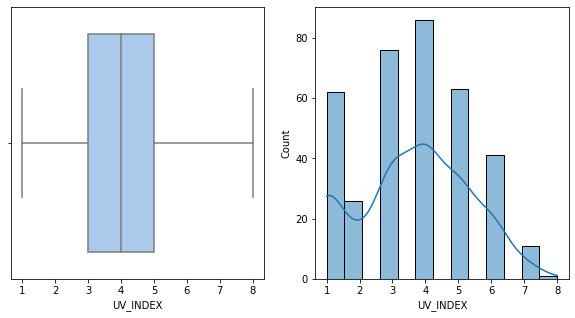

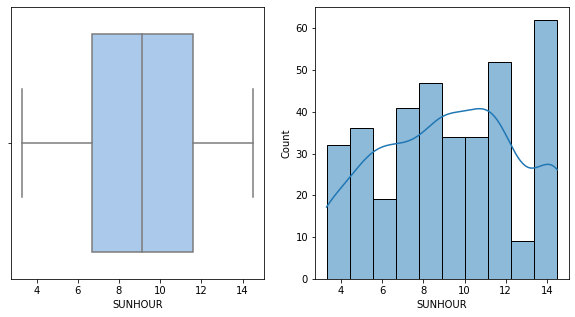

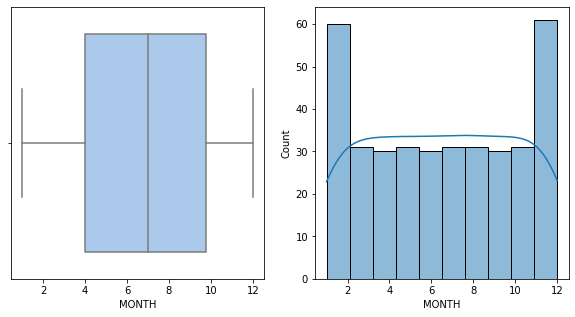

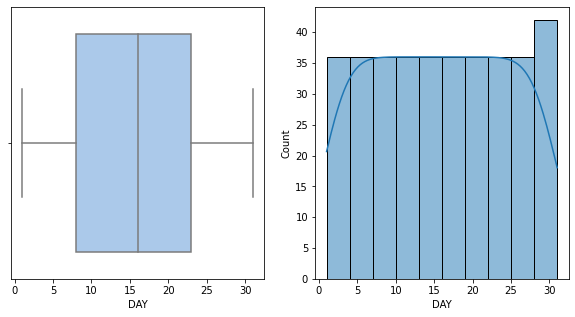

In [11]:
# pour chaque colonne numérique du DF, appliquer la fonction get_plot()
for col in df.select_dtypes(include='number').columns:
  get_plot(col)

# 2. Machine Learning : PCA

In [12]:
# création slice du DF:
X = df.select_dtypes(include='number')
y = df['OPINION']

X.shape

(366, 22)

In [14]:
# Scaler pour standardiser les données
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_scaled.shape

(366, 22)

In [15]:
# initialisation du modèle PCA
pca = PCA()

# fiting de ce modèle sur les données standardisées
pca.fit(X_scaled)

# ratio de variance
pca.explained_variance_ratio_

array([4.09974128e-01, 2.08764137e-01, 6.44852689e-02, 5.96277270e-02,
       4.57715483e-02, 3.90945593e-02, 2.96727035e-02, 2.79956895e-02,
       2.50111074e-02, 2.23798923e-02, 2.06096373e-02, 1.72091698e-02,
       1.06921087e-02, 5.50690832e-03, 5.23972301e-03, 3.80814302e-03,
       2.24566722e-03, 7.91559882e-04, 5.45015534e-04, 4.08638014e-04,
       1.66668050e-04, 5.24109907e-36])

Difficile à lire, utilisons l'autre méthode

In [25]:
# combien de composantes principales pour expliquer 70% de la variance? Il en faut 4 
pca2 = PCA(n_components=0.70)
pca2.fit(X_scaled)
result = pca2.transform(X_scaled)
result.shape

(366, 4)

In [26]:
# combien de composantes principales pour expliquer 80% de la variance? Il en faut 6
pca3 = PCA(n_components=0.80)
pca3.fit(X_scaled)
result = pca3.transform(X_scaled)
result.shape

(366, 6)

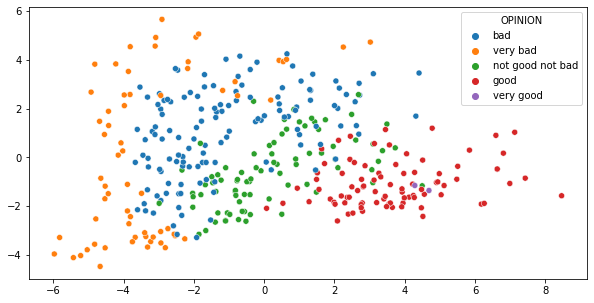

In [41]:
# transformation des données 
X_pca = pca.fit_transform(X_scaled)

# visualisation
plt.figure(figsize=(10,5))
sns.scatterplot(x = X_pca[:,0], y=X_pca[:,1], hue = y)
plt.show()

# 3. Classification KNN

In [35]:
# KNN sur X_scaled et y
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_scaled, y)

print("Score sur X_scaled & y :", modelKNN.score(X_scaled, y))

Score sur X_scaled & y : 0.8661202185792349


In [40]:
# modèle sur les deux première col de X_pca et y
X_pca_red = X_pca[:, :2]
modelKNN = KNeighborsClassifier()
modelKNN.fit(X_pca_red, y)

print("Score sur X_pca & y :", modelKNN.score(X_pca_red, y))

Score sur X_pca & y : 0.8469945355191257


Le score est proche mais différent et démontre que le modèle est bon. Il semble que les données standardisée donnent un meilleur résultat.